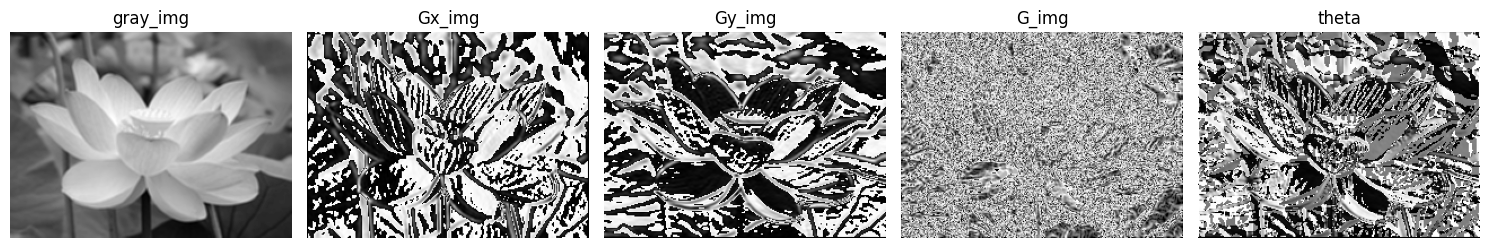

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
def show_diff(**images):
    n = len(images)
    fig, axs = plt.subplots(1, n, figsize=(15, 4))
    axs = axs.flatten() if n > 1 else [axs]
    for ax, img_info in zip(axs, images.values()):
        img, title, xlabel, ylabel = img_info
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
def filter(img, kernel):
    kernel_size = kernel.shape[0]
    r = kernel_size // 2
    height, width = img.shape[:2]
    padding_img = np.pad(img, ((r, r), (r, r)), 'reflect')
    new_img = np.zeros_like(img)

    for y in range(height):
        for x in range(width):
            region = padding_img[y:y+kernel_size, x:x+kernel_size]
            conv = np.sum(np.multiply(region, kernel))
            new_img[y, x] = conv
    return new_img
def get_guass_kernel(kernel_size, sigma):
    r = int(kernel_size//2)
    kernel = np.zeros((kernel_size, kernel_size))
    for y in range(0-r,0+r+1):
        for x in range(0-r,0+r+1):
            kernel[y+1,x+1] = 1/(2*np.pi*(sigma**2))*np.exp(-(x**2+y**2)/(2*(sigma**2)))
    # normalize 
    sum_of_kernel = np.sum(kernel)
    kernel = kernel / sum_of_kernel
    return kernel
# 輸入圖片
img = cv2.imread("./input/lotus.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img = filter(gray_img,get_guass_kernel(kernel_size=3,sigma=1.4))
sobel_GX = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]],dtype=np.float32)
sobel_GY = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
Gx_img = filter(gray_img,sobel_GX) # 有正有負的矩陣 表示的是(x,y)該點的亮度變化(x,y右邊亮=>正值 ,反之則為負)
Gy_img = filter(gray_img,sobel_GY)
# 顯示GX GY G處理後的圖片
# Gx_img = cv2.filter2D(gray_img,-1,sobel_GX) # 有正有負的矩陣 表示的是(x,y)該點的亮度變化(x,y右邊亮=>正值 ,反之則為負)
# Gy_img = cv2.filter2D(gray_img,-1,sobel_GY)
G_img = np.sqrt(Gx_img**2 + Gy_img**2)

theta = np.arctan2(Gy_img,Gx_img) * 180 / np.pi #梯度計算 梯度的大小是該方向角度的變化程度
theta[theta < 0] += 180 # 對於那些小於0的角度+180度
show_diff(
    Origin = (gray_img,"gray_img","width","height"),
    Image1 = (Gx_img,"Gx_img","width","height",),
    Image2 = (Gy_img,"Gy_img","width","height",),
    Image3 = (G_img,"G_img","width","height",),
    Image4 = (theta,"theta","width","height",)
)

# show_diff(
#     Origin = (gray_img,"gray_img","width","height"),
#     Image1 = (cv2.filter2D(gray_img,-1,sobel_GX),"Gx_img_cv","width","height",),
#     Image2 = (cv2.filter2D(gray_img,-1,sobel_GY),"Gy_img_cv","width","height",),
#     # Image3 = (,"G_img_cv","width","height",),
#     # Image4 = (theta,"theta_cv","width","height",)
# )